### Import modul

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Preparation

In [93]:
#load dataset
data = pd.read_csv('netflix_titles.csv')

In [94]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [95]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [96]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [98]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [99]:
data.describe(include = 'O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s7025,Movie,Jim Gaffigan: Mr. Universe,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [54]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
nan            4
UR             3
NC-17          3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

In [100]:
data[data['rating'] == '66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### Catatan:
1. 'duration' memiliki satuan yang berbeda dan (3 data berada dalam 'rating')
2. 'type' merupakan kategori
3. 'director' 29.9% datanya adalah NaN
4. 'rating' memiliki nilai yang tidak biasa yaitu (84 min, 66 min, 74 min)

### Data cleaning and correction

In [101]:
#change dtype

data['type'] = data['type'].astype('category')
data['date_added'] = pd.to_datetime(data['date_added'])

In [102]:
data.dtypes

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [240]:
#duration
#data[data['rating'] == '66 min']
#data[data['rating'] == '74 min']
#data[data['rating'] == '84 min']
data.loc[data['title'].str.contains('Louis C')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,season,year_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",74,,2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84,,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...,66,,2016.0


In [113]:
for i in ['66 min','74 min','84 min']:
    data.loc[data['rating'] == i, 'duration'] = i

In [161]:
# durasi memiliki satuan yang berbeda (menit/min dan season/seasons)
# kita akan membuat fitur baru yang memisahkan duration_min dan season

data['duration_min'] = data['duration'].apply(lambda x: x.split(' ')[0] if 'Season' not in x else '')
data['season'] = data['duration'].apply(lambda x: x.split(' ')[0] if 'Season' in x else '')

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  duration_min  8807 non-null   object        
 13  season        8807 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(11)
memory usage: 903.3+ KB


In [164]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,,2


In [232]:
#rating
#data[data['rating'] == '66 min']
#data[data['rating'] == '74 min']
#data[data['rating'] == '84 min']
data.loc[data['title'].str.contains('Louis C')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,season,year_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",74,,2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84,,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,66,,2016.0


In [235]:
data.loc[data['description'].str.contains('comedy')]['rating'].value_counts()

TV-MA     96
TV-14     26
TV-PG     14
R          8
PG         7
PG-13      7
TV-G       4
TV-Y7      4
NR         3
84 min     1
Name: rating, dtype: int64

In [238]:
data.loc[data['title'].str.contains('Louis C'), 'rating'] = 'TV-MA' 

In [239]:
data.loc[data['title'].str.contains('Louis C'), 'rating']

5541    TV-MA
5794    TV-MA
5813    TV-MA
Name: rating, dtype: object

In [246]:
data.rating.value_counts(dropna = False)

TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
UR             3
NC-17          3
Name: rating, dtype: int64

### Visual exploratory data analysis

#### Content type on Netflix

In [165]:
data['type'].value_counts(normalize = True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

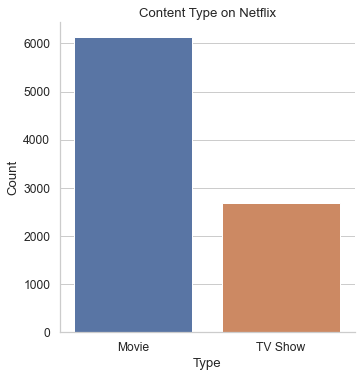

In [308]:
sns.set(font_scale = 1.1, style = 'whitegrid')
sns.catplot(x = 'type', data = data, kind = 'count' )
plt.title('Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count');

In [187]:
data['year_added'] = data['date_added'].dt.year

In [195]:
movie_tv_added = data.groupby(['type','year_added'])['title'].count().reset_index()
movie_tv_added

,type,year_added,title
0,Movie,2008.0,1
1,Movie,2009.0,2
2,Movie,2010.0,1
3,Movie,2011.0,13
4,Movie,2012.0,3
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,56
8,Movie,2016.0,253
9,Movie,2017.0,839


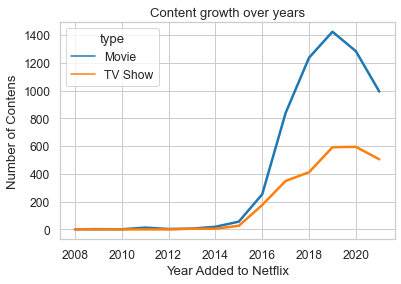

In [306]:
sns.set(font_scale = 1.1, style = 'whitegrid')
sns.lineplot(x = 'year_added', y = 'title', data = movie_tv_added, hue = 'type', palette="tab10", linewidth=2.5)
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Contens')
plt.title('Content growth over years')
plt.show()

#### Rating analysis

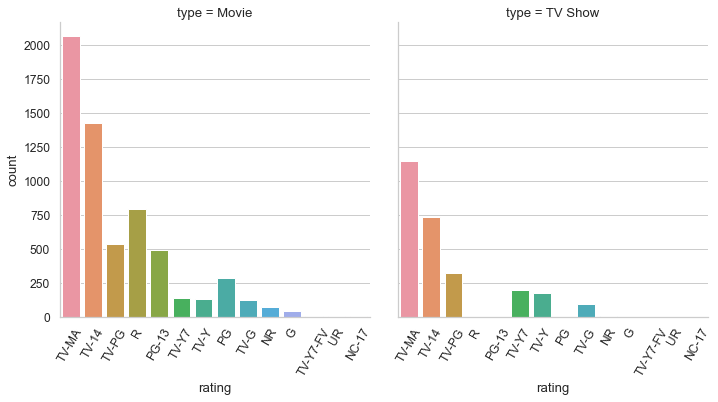

In [307]:
sns.set(font_scale = 1.1, style = 'whitegrid')
g = sns.catplot(x = 'rating', data = data, kind = 'count', order = data['rating'].value_counts().index, col = 'type', col_wrap = 2)
g.set_xticklabels(rotation=60)
plt.show();